# Assignment on Data Warehouse (DW) 
## Data Forecast 
    Author: Md. Saif Ahammod Khan
    ID: 2315333650 
    Course: CSE 512
    Course Title: Distributed Database
    Instructor: Dr. Abu Sayed Md. Latiful Hoque 
    Section: 01
    Semister:Spring 2023
    Email: saif.khan.2315333@northsouth.edu
    Contact No: +8801917-089109

# 1. Setup Environment

## 1.1. Importing the liberaries

In [135]:
import psycopg2
import pandas as pd
import psycopg2.extras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# 2. Data Load

## 2.1. Establishing the connection with database

In [136]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="postgres",
                                          user= "postgres",
                                          password= "DDMSass",
                                          host="localhost",
                                          port="5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection
con = PostgresConnection().getConnection()

Successfully connected to the database


## 2.2 Data Load From PostgreSQL Database

### 2.2.1 Load Fact Table

In [137]:
con = PostgresConnection().getConnection()
queries = """
            SELECT *
            FROM ecomdb.fact_table ft 
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(queries)
# fetch the results
records = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()

fact_dim = pd.DataFrame(records, columns=['payment_key','item_key','store_key', 'time_key',  'coustomer_key',  'quantity', 'unit', 'unit_price', 'total_price'])
fact_dim

Successfully connected to the database


,payment_key,item_key,store_key,time_key,coustomer_key,quantity,unit,unit_price,total_price
0,P026,I00177,S00307,T049189,C004510,1,ct,35.0,35.0
1,P022,I00248,S00595,T041209,C008967,1,rolls,26.0,26.0
2,P030,I00195,S00496,T03633,C007261,8,ct,12.5,100.0
3,P032,I00131,S0086,T084631,C007048,8,ct,14.0,112.0
4,P014,I00050,S00488,T071276,C006430,8,cans,8.0,64.0
...,...,...,...,...,...,...,...,...,...
999995,P010,I00063,S00502,T09247,C003726,5,cans,40.0,200.0
999996,P021,I00252,S00225,T023483,C002581,1,ct,11.0,11.0
999997,P035,I00119,S00555,T039372,C006133,7,ct,53.0,371.0
999998,P031,I00257,S00440,T097975,C008735,2,ct,21.0,42.0


### 2.2.2 Load Time Dimentation

In [138]:
con = PostgresConnection().getConnection()
queries = """
            Select * 
            FROM ecomdb.time_dim td
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(queries)
# fetch the results
records = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()
time_dim = pd.DataFrame(records, columns=['time_key', 'date', 'hour', 'day', 'week', 'month', 'quarter', 'year'])
time_dim

Successfully connected to the database


,time_key,date,hour,day,week,month,quarter,year
0,T00001,2017-05-20 14:56:00+06:00,14,20,3rd Week,5,Q2,2017
1,T00002,2015-01-30 22:14:00+06:00,22,30,4th Week,1,Q1,2015
2,T00003,2020-03-14 02:34:00+06:00,2,14,2nd Week,3,Q1,2020
3,T00004,2018-04-27 12:19:00+06:00,12,27,4th Week,4,Q2,2018
4,T00005,2018-04-14 10:43:00+06:00,10,14,2nd Week,4,Q2,2018
...,...,...,...,...,...,...,...,...
99994,T099995,2015-04-01 17:22:00+06:00,17,4,1st Week,1,Q1,2015
99995,T099996,2015-01-17 21:09:00+06:00,21,17,3rd Week,1,Q1,2015
99996,T099997,2020-01-23 14:42:00+06:00,14,23,4th Week,1,Q1,2020
99997,T099998,2015-10-31 13:52:00+06:00,13,31,4th Week,10,Q4,2015


### 2.2.3 Load Store Dimentation

In [139]:
con = PostgresConnection().getConnection()
queries = """
            Select * 
            FROM ecomdb.store_dim sd 
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(queries)
# fetch the results
records = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()
store_dim = pd.DataFrame(records, columns=['store_key', 'division','district','upazila'])
store_dim

Successfully connected to the database


,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR
...,...,...,...,...
721,S00722,BARISAL,BARISAL,HIZLA
722,S00723,BARISAL,BARISAL,BARISAL SADAR (KOTWALI)
723,S00724,BARISAL,BARISAL,MEHENDIGANJ
724,S00725,BARISAL,BARISAL,MULADI


## 2.2.4. Load Item Dimentation

In [140]:
con = PostgresConnection().getConnection()
queries = """
            Select * 
            FROM ecomdb.item_dim it
            """
cur = con.cursor()
cur.execute("BEGIN")
cur.execute(queries)
# fetch the results
records = cur.fetchall()
# commit the transaction
con.commit()
# close the cursor
cur.close()
item_dim = pd.DataFrame(records, columns=['item_key', 'item_name', 'description', 'unit_price', 'man_country', 'supplier', 'unit'])
item_dim

Successfully connected to the database


,item_key,item_name,description,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans
...,...,...,...,...,...,...,...
259,I00260,Napkins Square Lunch,Kitchen Supplies,15.00,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,ct
260,I00261,POM 2 ply paper towels,Kitchen Supplies,33.00,Lithuania,BIGSO AB,ct
261,I00262,Strong Everyday Napkins,Kitchen Supplies,14.00,Netherlands,Bolsius Boxmeer,ct
262,I00263,Advil 2 pill packets,Medicine,14.00,Lithuania,BIGSO AB,Ct


# 3. Data Pre-processing

## 3.1 Checking Null Value

In [141]:
fact_dim.isnull().sum()

payment_key      0
item_key         0
store_key        0
time_key         0
coustomer_key    0
quantity         0
unit             0
unit_price       0
total_price      0
dtype: int64

In [142]:
time_dim.isnull().sum()

time_key    0
date        0
hour        0
day         0
week        0
month       0
quarter     0
year        0
dtype: int64

In [143]:
store_dim.isnull().sum()

store_key    0
division     0
district     0
upazila      0
dtype: int64

In [144]:
item_dim.isnull().sum()

item_key       0
item_name      0
description    0
unit_price     0
man_country    0
supplier       0
unit           0
dtype: int64

## 3.2 Merging Data

### Renaming columns unit and unit price to avoid conflict between fact_dim and item_dim

In [145]:
fact_dim.rename(columns = {'unit':'f_unit', 'unit_price':'f_unit_price'}, inplace = True)

In [146]:
item_dim.rename(columns = {'unit':'i_unit', 'unit_price':'i_unit_price'}, inplace = True)

### 3.2. Merging fact_dim with item_dim

In [147]:
df_merged = fact_dim.merge(item_dim)
df_merged

,payment_key,item_key,store_key,time_key,coustomer_key,quantity,f_unit,f_unit_price,total_price,item_name,description,i_unit_price,man_country,supplier,i_unit
0,P026,I00177,S00307,T049189,C004510,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
1,P014,I00177,S00372,T025440,C008383,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
2,P024,I00177,S00708,T022426,C006666,10,ct,35.0,350.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
3,P034,I00177,S00106,T084725,C004584,2,ct,35.0,70.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
4,P027,I00177,S00223,T023941,C004336,10,ct,35.0,350.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,P018,I00182,S00266,T045188,C000397,6,oz,15.0,90.0,Reese's Pieces Peanutbutter Candy,Food - Chocolate,15.0,Netherlands,Bolsius Boxmeer,oz
999996,P022,I00182,S00136,T069597,C002434,6,oz,15.0,90.0,Reese's Pieces Peanutbutter Candy,Food - Chocolate,15.0,Netherlands,Bolsius Boxmeer,oz
999997,P007,I00182,S0097,T041066,C003262,7,oz,15.0,105.0,Reese's Pieces Peanutbutter Candy,Food - Chocolate,15.0,Netherlands,Bolsius Boxmeer,oz
999998,P021,I00182,S00449,T094979,C008832,6,oz,15.0,90.0,Reese's Pieces Peanutbutter Candy,Food - Chocolate,15.0,Netherlands,Bolsius Boxmeer,oz


### 3.2.2 Merging fact_dim and item_dim with time_dim

In [148]:
df_merged2 = df_merged.merge(time_dim)
df_merged2

,payment_key,item_key,store_key,time_key,coustomer_key,quantity,f_unit,f_unit_price,total_price,item_name,...,man_country,supplier,i_unit,date,hour,day,week,month,quarter,year
0,P026,I00177,S00307,T049189,C004510,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,...,Netherlands,Bolsius Boxmeer,ct,2016-04-26 17:13:00+06:00,17,26,4th Week,4,Q2,2016
1,P002,I00058,S00677,T049189,C002344,1,bottles,22.0,22.0,Premier Protein Shake Choc. 11oz,...,United States,MAESA SAS,bottles,2016-04-26 17:13:00+06:00,17,26,4th Week,4,Q2,2016
2,P035,I00042,S00616,T049189,C007222,3,bottles,28.0,84.0,Topo Chico 12 oz glass,...,United States,MAESA SAS,bottles,2016-04-26 17:13:00+06:00,17,26,4th Week,4,Q2,2016
3,P004,I00101,S00408,T049189,C002005,2,tubs,15.0,30.0,French Vanilla International Delight,...,Germany,Friedola 1888 GmbH,tubs,2016-04-26 17:13:00+06:00,17,26,4th Week,4,Q2,2016
4,P021,I00036,S00119,T049189,C001803,8,cans,16.0,128.0,La Croix Sparkling Orange 12 oz,...,China,"CHERRY GROUP CO.,LTD",cans,2016-04-26 17:13:00+06:00,17,26,4th Week,4,Q2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,P037,I00070,S00285,T093012,C003667,11,bottles,17.5,192.5,Gatorade Liberty Variety 12 oz,...,United States,MAESA SAS,bottles,2015-09-17 20:47:00+06:00,20,17,3rd Week,9,Q3,2015
999996,P021,I00054,S0099,T093012,C006936,2,cans,40.0,80.0,Monster Zero Ultra 16 oz,...,poland,CHROMADURLIN S.A.S,cans,2015-09-17 20:47:00+06:00,20,17,3rd Week,9,Q3,2015
999997,P036,I00118,S0079,T024701,C002369,6,ct,42.0,252.0,K Cups - Organic Breakfast Blend,...,Finland,HARDFORD AB,ct,2014-07-04 02:11:00+06:00,2,7,1st Week,4,Q2,2014
999998,P036,I00099,S00685,T097767,C002812,1,oz,6.0,6.0,Coffee-Mate Original Flavor Cold,...,Bangladesh,DENIMACH LTD,oz,2018-01-01 21:31:00+06:00,21,1,1st Week,1,Q1,2018


### 3.2.3 Merging fact_dim, item_dim and  time_dim with store_dim

In [149]:
merged_data = df_merged2.merge(store_dim)
merged_data

,payment_key,item_key,store_key,time_key,coustomer_key,quantity,f_unit,f_unit_price,total_price,item_name,...,date,hour,day,week,month,quarter,year,division,district,upazila
0,P026,I00177,S00307,T049189,C004510,1,ct,35.00,35.00,M&M Peanut Candy 1.7 oz,...,2016-04-26 17:13:00+06:00,17,26,4th Week,4,Q2,2016,DHAKA,JAMALPUR,ISLAMPUR
1,P024,I00077,S00307,T080659,C002335,1,cans,6.75,6.75,Fuze Iced Tea,...,2020-06-14 04:39:00+06:00,4,14,2nd Week,6,Q2,2020,DHAKA,JAMALPUR,ISLAMPUR
2,P026,I00054,S00307,T096209,C006278,3,cans,40.00,120.00,Monster Zero Ultra 16 oz,...,2017-09-13 01:52:00+06:00,1,13,2nd Week,9,Q3,2017,DHAKA,JAMALPUR,ISLAMPUR
3,P006,I00112,S00307,T04881,C008489,5,ct.,14.00,70.00,Swiss Miss Hot Cocoa Mix 1 oz,...,2019-12-20 18:59:00+06:00,18,20,3rd Week,12,Q4,2019,DHAKA,JAMALPUR,ISLAMPUR
4,P011,I00241,S00307,T094287,C007700,4,ct,12.00,48.00,Peppermints Hard Candy,...,2014-06-14 18:43:00+06:00,18,14,2nd Week,6,Q2,2014,DHAKA,JAMALPUR,ISLAMPUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,P010,I00172,S00253,T09535,C003588,9,oz,19.00,171.00,Hershey Chocoalte Minatures Assort.,...,2018-06-22 06:57:00+06:00,6,22,4th Week,6,Q2,2018,DHAKA,DHAKA,KALABAGAN
999996,P010,I00100,S00253,T086955,C001630,4,oz.,10.00,40.00,Coffee-mate Original Powdered Creamer,...,2020-01-02 00:44:00+06:00,0,1,1st Week,2,Q1,2020,DHAKA,DHAKA,KALABAGAN
999997,P017,I00114,S00253,T099703,C005089,3,ct,44.00,132.00,K Cups - Starbuck's Pike Place,...,2014-05-29 06:56:00+06:00,6,29,4th Week,5,Q2,2014,DHAKA,DHAKA,KALABAGAN
999998,P037,I00030,S00253,T078482,C002853,3,cans,16.00,48.00,La Croix Sparkling Berry 12 ozv,...,2017-11-25 20:42:00+06:00,20,25,4th Week,11,Q4,2017,DHAKA,DHAKA,KALABAGAN


### Checking Null Value of Merged Data

In [150]:
merged_data.isnull().sum()

payment_key      0
item_key         0
store_key        0
time_key         0
coustomer_key    0
quantity         0
f_unit           0
f_unit_price     0
total_price      0
item_name        0
description      0
i_unit_price     0
man_country      0
supplier         0
i_unit           0
date             0
hour             0
day              0
week             0
month            0
quarter          0
year             0
division         0
district         0
upazila          0
dtype: int64

## 3.3 Data Cleaning

### 3.3.1 Check Column List

In [151]:
cleaned_data = merged_data

In [152]:
column_names = list(cleaned_data.columns.values)
column_names

['payment_key',
 'item_key',
 'store_key',
 'time_key',
 'coustomer_key',
 'quantity',
 'f_unit',
 'f_unit_price',
 'total_price',
 'item_name',
 'description',
 'i_unit_price',
 'man_country',
 'supplier',
 'i_unit',
 'date',
 'hour',
 'day',
 'week',
 'month',
 'quarter',
 'year',
 'division',
 'district',
 'upazila']

### 3.3.2 Drop Unnecessary features

In [153]:
cleaned_data = cleaned_data.drop(['payment_key','item_key','time_key','coustomer_key','f_unit','i_unit_price','i_unit'], axis=1)
cleaned_data

,store_key,quantity,f_unit_price,total_price,item_name,description,man_country,supplier,date,hour,day,week,month,quarter,year,division,district,upazila
0,S00307,1,35.00,35.00,M&M Peanut Candy 1.7 oz,Food - Chocolate,Netherlands,Bolsius Boxmeer,2016-04-26 17:13:00+06:00,17,26,4th Week,4,Q2,2016,DHAKA,JAMALPUR,ISLAMPUR
1,S00307,1,6.75,6.75,Fuze Iced Tea,Beverage - Iced Tea,poland,CHROMADURLIN S.A.S,2020-06-14 04:39:00+06:00,4,14,2nd Week,6,Q2,2020,DHAKA,JAMALPUR,ISLAMPUR
2,S00307,3,40.00,120.00,Monster Zero Ultra 16 oz,Beverage - Energy/Protein,poland,CHROMADURLIN S.A.S,2017-09-13 01:52:00+06:00,1,13,2nd Week,9,Q3,2017,DHAKA,JAMALPUR,ISLAMPUR
3,S00307,5,14.00,70.00,Swiss Miss Hot Cocoa Mix 1 oz,Coffee Hot Cocoa,India,Indo Count Industries Ltd,2019-12-20 18:59:00+06:00,18,20,3rd Week,12,Q4,2019,DHAKA,JAMALPUR,ISLAMPUR
4,S00307,4,12.00,48.00,Peppermints Hard Candy,Gum - Mints,Lithuania,BIGSO AB,2014-06-14 18:43:00+06:00,18,14,2nd Week,6,Q2,2014,DHAKA,JAMALPUR,ISLAMPUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,S00253,9,19.00,171.00,Hershey Chocoalte Minatures Assort.,Food - Chocolate,Netherlands,Bolsius Boxmeer,2018-06-22 06:57:00+06:00,6,22,4th Week,6,Q2,2018,DHAKA,DHAKA,KALABAGAN
999996,S00253,4,10.00,40.00,Coffee-mate Original Powdered Creamer,Coffee Cream,Netherlands,Bolsius Boxmeer,2020-01-02 00:44:00+06:00,0,1,1st Week,2,Q1,2020,DHAKA,DHAKA,KALABAGAN
999997,S00253,3,44.00,132.00,K Cups - Starbuck's Pike Place,Coffee K-Cups,Lithuania,BIGSO AB,2014-05-29 06:56:00+06:00,6,29,4th Week,5,Q2,2014,DHAKA,DHAKA,KALABAGAN
999998,S00253,3,16.00,48.00,La Croix Sparkling Berry 12 ozv,a. Beverage Sparkling Water,Finland,HARDFORD AB,2017-11-25 20:42:00+06:00,20,25,4th Week,11,Q4,2017,DHAKA,DHAKA,KALABAGAN


## 3.4 Data Transform

### 3.4.1 Check Data Type

In [154]:
transformed_data = cleaned_data
transformed_data.dtypes

store_key                          object
quantity                            int64
f_unit_price                      float64
total_price                       float64
item_name                          object
description                        object
man_country                        object
supplier                           object
date            datetime64[ns, UTC+06:00]
hour                                int64
day                                 int64
week                               object
month                               int64
quarter                            object
year                                int64
division                           object
district                           object
upazila                            object
dtype: object

### 3.4.2 Convert Categorical Data Into Numeric

### Convert item_Name  Data Into Numeric

In [155]:
transformed_data['item_name'] = pd.factorize(transformed_data['item_name'])[0]
transformed_data.item_name.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### Convert store_key  Data Into Numeric

In [156]:
transformed_data['store_key'] = pd.factorize(transformed_data['store_key'])[0]
transformed_data.store_key.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### Convert man_country  Data Into Numeric

In [157]:
transformed_data['man_country'] = pd.factorize(transformed_data['man_country'])[0]
transformed_data.man_country.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

### Convert supplier Data Into Numeric

In [158]:
transformed_data['supplier'] = pd.factorize(transformed_data['supplier'])[0]
transformed_data.supplier.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

### Convert date  Data Into Numeric

In [159]:
transformed_data['date'] = pd.to_datetime(transformed_data['date'])
date_time

0        2016-04-26 17:13:00+06:00
1        2020-06-14 04:39:00+06:00
2        2017-09-13 01:52:00+06:00
3        2019-12-20 18:59:00+06:00
4        2014-06-14 18:43:00+06:00
                    ...           
999995   2018-06-22 06:57:00+06:00
999996   2020-01-02 00:44:00+06:00
999997   2014-05-29 06:56:00+06:00
999998   2017-11-25 20:42:00+06:00
999999   2014-07-08 14:22:00+06:00
Name: date, Length: 1000000, dtype: datetime64[ns, UTC+06:00]

### Convert description  Data Into Numeric

In [160]:
transformed_data['description'] = pd.factorize(transformed_data['description'])[0]
transformed_data.description.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

### Convert Date Data

### Convert week Data Into Numeric
    1st Week = 0
    2nd Week = 1
    3rd Week = 2
    4th Week = 3

In [161]:
transformed_data['week'].replace(['1st Week', '2nd Week', '3rd Week', '4th Week'],[0, 1, 2, 3,], inplace=True)
transformed_data.week.unique()

array([3, 1, 2, 0], dtype=int64)

### Convert quarter Data Into Numeric
    Q1 = 0
    Q2 = 1
    Q3 = 2
    Q4 = 3
    

In [162]:
transformed_data['quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'],[0, 1, 2, 3,], inplace=True)
transformed_data.quarter.unique()

array([1, 2, 3, 0], dtype=int64)

### Convert division Data Into Numeric
    DHAKA = 0
    CHITTAGONG = 1
    RAJSHAHI = 2
    KHULNA = 3
    RANGPUR = 4
    SYLHET = 5
    BARISAL = 6

In [163]:
transformed_data['division'].replace(['DHAKA', 'CHITTAGONG', 'RAJSHAHI', 'KHULNA', 'RANGPUR', 'SYLHET', 'BARISAL'],[0, 1, 2, 3, 4, 5, 6], inplace=True)
transformed_data.division.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

### Convert district Data Into Numeric

In [164]:
transformed_data['district'] = pd.factorize(transformed_data['district'])[0]
transformed_data.district.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=int64)

### Convert upazila Data Into Numeric

In [165]:
transformed_data['upazila'] = pd.factorize(transformed_data['upazila'])[0]
transformed_data.upazila.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### Checking Data Types

In [166]:
transformed_data.dtypes

store_key                           int64
quantity                            int64
f_unit_price                      float64
total_price                       float64
item_name                           int64
description                         int64
man_country                         int64
supplier                            int64
date            datetime64[ns, UTC+06:00]
hour                                int64
day                                 int64
week                                int64
month                               int64
quarter                             int64
year                                int64
division                            int64
district                            int64
upazila                             int64
dtype: object

# 4. Data Visualize

## 4.1 Visualizing Relations Between Data

### Importing Required Liberaries

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
import random

### 4.1.1 Generating Heatmap 

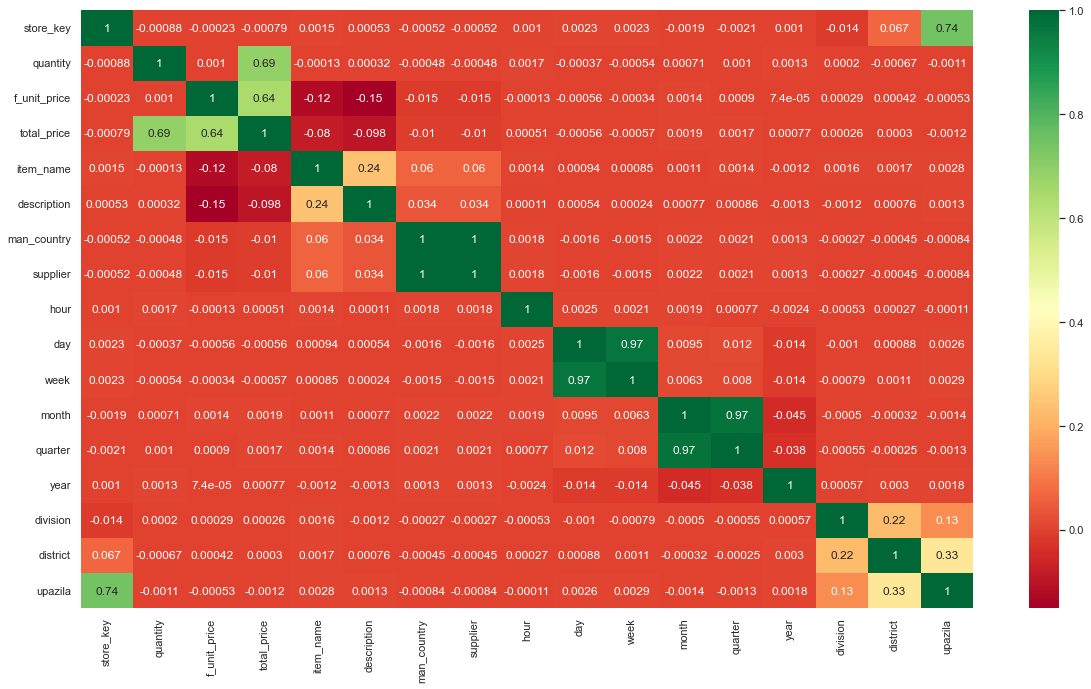

<Figure size 1440x720 with 0 Axes>

In [168]:
plt.subplots(figsize=(20,11))
heat_plot = sns.heatmap(transformed_data.corr(method='pearson'),annot=True, cmap= "RdYlGn")
plt.figure()
plt.show()

### 4.1.2 Generating Correlation Bar

<AxesSubplot:title={'center':'Correlation with risk (SFN_Data1)'}>

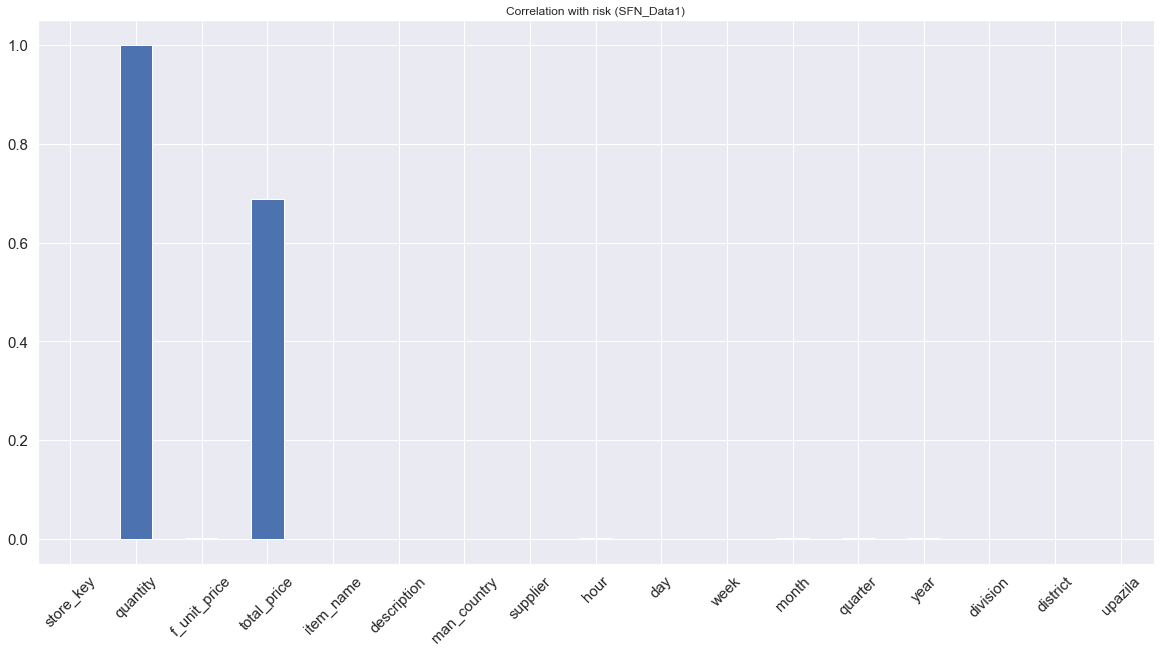

In [169]:
transformed_data.corrwith(transformed_data.quantity).plot.bar(figsize=(20,10),title="Correlation with risk (SFN_Data1)",fontsize=15,rot=45,grid=True)

# 5. Forecast the one year sales (Breakdown monthly) for each of the items.

In [170]:
problem1_data = transformed_data
problem1_data

,store_key,quantity,f_unit_price,total_price,item_name,description,man_country,supplier,date,hour,day,week,month,quarter,year,division,district,upazila
0,0,1,35.00,35.00,0,0,0,0,2016-04-26 17:13:00+06:00,17,26,3,4,1,2016,0,0,0
1,0,1,6.75,6.75,1,1,1,1,2020-06-14 04:39:00+06:00,4,14,1,6,1,2020,0,0,0
2,0,3,40.00,120.00,2,2,1,1,2017-09-13 01:52:00+06:00,1,13,1,9,2,2017,0,0,0
3,0,5,14.00,70.00,3,3,2,2,2019-12-20 18:59:00+06:00,18,20,2,12,3,2019,0,0,0
4,0,4,12.00,48.00,4,4,3,3,2014-06-14 18:43:00+06:00,18,14,1,6,1,2014,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,725,9,19.00,171.00,21,0,0,0,2018-06-22 06:57:00+06:00,6,22,3,6,1,2018,0,1,211
999996,725,4,10.00,40.00,188,13,0,0,2020-01-02 00:44:00+06:00,0,1,0,2,0,2020,0,1,211
999997,725,3,44.00,132.00,110,16,3,3,2014-05-29 06:56:00+06:00,6,29,3,5,1,2014,0,1,211
999998,725,3,16.00,48.00,203,8,7,7,2017-11-25 20:42:00+06:00,20,25,3,11,3,2017,0,1,211


In [180]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from patsy import dmatrix, build_design_matrices

df = problem1_data
df['t'] = df.index.values
df

,store_key,quantity,f_unit_price,total_price,item_name,description,man_country,supplier,date,hour,day,week,month,quarter,year,division,district,upazila,t
0,0,NaN,35.00,35.00,0,0,0,0,2016-04-26 17:13:00+06:00,17,26,3,4,1,2016,0,0,0,0
1,0,NaN,6.75,6.75,1,1,1,1,2020-06-14 04:39:00+06:00,4,14,1,6,1,2020,0,0,0,1
2,0,-2.363952,40.00,120.00,2,2,1,1,2017-09-13 01:52:00+06:00,1,13,1,9,2,2017,0,0,0,2
3,0,-0.742579,14.00,70.00,3,3,2,2,2019-12-20 18:59:00+06:00,18,20,2,12,3,2019,0,0,0,3
4,0,-1.118914,12.00,48.00,4,4,3,3,2014-06-14 18:43:00+06:00,18,14,1,6,1,2014,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,725,-0.239279,19.00,171.00,21,0,0,0,2018-06-22 06:57:00+06:00,6,22,3,6,1,2018,0,1,211,999995
999996,725,-1.118914,10.00,40.00,188,13,0,0,2020-01-02 00:44:00+06:00,0,1,0,2,0,2020,0,1,211,999996
999997,725,-2.363952,44.00,132.00,110,16,3,3,2014-05-29 06:56:00+06:00,6,29,3,5,1,2014,0,1,211,999997
999998,725,-2.363952,16.00,48.00,203,8,7,7,2017-11-25 20:42:00+06:00,20,25,3,11,3,2017,0,1,211,999998


In [181]:
train_cutoff = 96
validate_cutoff = 120

train_df = df[df['t'] <= train_cutoff]
select_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

dm = dmatrix('C(month)-1', df)
train_exog = build_design_matrices([dm.design_info], train_df, return_type='dataframe')[0]
select_exog = build_design_matrices([dm.design_info], select_df, return_type='dataframe')[0]
forecast_exog = build_design_matrices([dm.design_info], forecast_df, return_type='dataframe')[0]


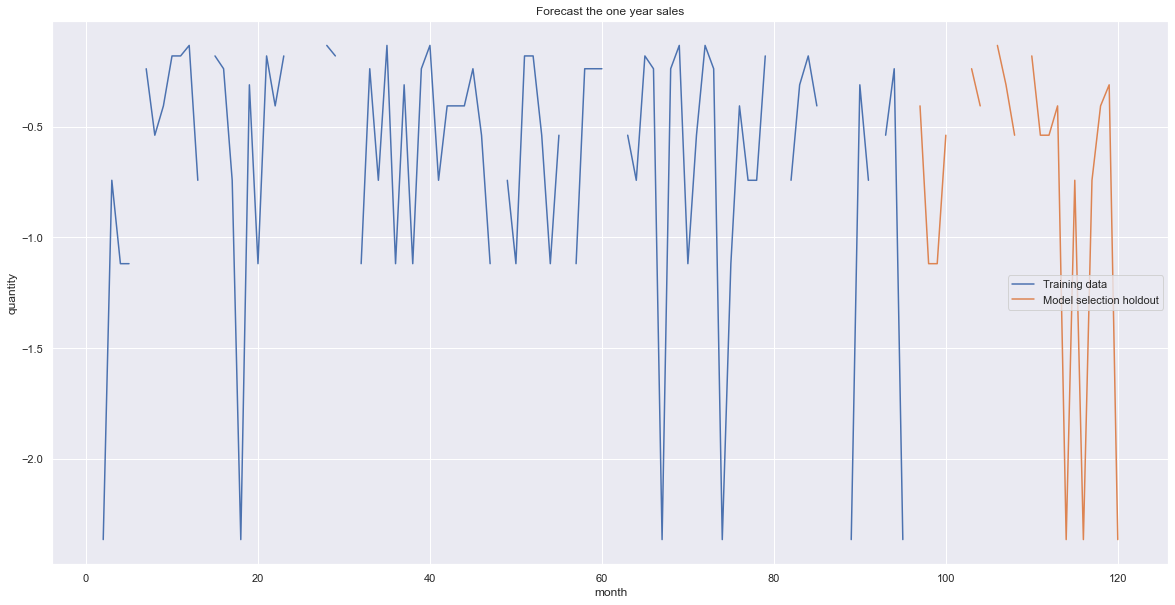

In [184]:
plt.plot(train_df.t, train_df.quantity, label='Training data')
plt.plot(select_df.t, select_df.quantity, label='Model selection holdout')
plt.legend()
plt.title('Forecast the one year sales')
plt.ylabel('quantity')
plt.xlabel('month')
plt.show()


# 6 Forecast the sales of the stores for the next 30 days.

In [188]:
problem2_data = transformed_data
problem2_data

,store_key,quantity,f_unit_price,total_price,item_name,description,man_country,supplier,date,hour,day,week,month,quarter,year,division,district,upazila,t
0,0,NaN,35.00,35.00,0,0,0,0,2016-04-26 17:13:00+06:00,17,26,3,4,1,2016,0,0,0,0
1,0,NaN,6.75,6.75,1,1,1,1,2020-06-14 04:39:00+06:00,4,14,1,6,1,2020,0,0,0,1
2,0,-2.363952,40.00,120.00,2,2,1,1,2017-09-13 01:52:00+06:00,1,13,1,9,2,2017,0,0,0,2
3,0,-0.742579,14.00,70.00,3,3,2,2,2019-12-20 18:59:00+06:00,18,20,2,12,3,2019,0,0,0,3
4,0,-1.118914,12.00,48.00,4,4,3,3,2014-06-14 18:43:00+06:00,18,14,1,6,1,2014,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,725,-0.239279,19.00,171.00,21,0,0,0,2018-06-22 06:57:00+06:00,6,22,3,6,1,2018,0,1,211,999995
999996,725,-1.118914,10.00,40.00,188,13,0,0,2020-01-02 00:44:00+06:00,0,1,0,2,0,2020,0,1,211,999996
999997,725,-2.363952,44.00,132.00,110,16,3,3,2014-05-29 06:56:00+06:00,6,29,3,5,1,2014,0,1,211,999997
999998,725,-2.363952,16.00,48.00,203,8,7,7,2017-11-25 20:42:00+06:00,20,25,3,11,3,2017,0,1,211,999998


In [189]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from patsy import dmatrix, build_design_matrices

df = problem2_data
df['t'] = df.index.values
df

,store_key,quantity,f_unit_price,total_price,item_name,description,man_country,supplier,date,hour,day,week,month,quarter,year,division,district,upazila,t
0,0,NaN,35.00,35.00,0,0,0,0,2016-04-26 17:13:00+06:00,17,26,3,4,1,2016,0,0,0,0
1,0,NaN,6.75,6.75,1,1,1,1,2020-06-14 04:39:00+06:00,4,14,1,6,1,2020,0,0,0,1
2,0,-2.363952,40.00,120.00,2,2,1,1,2017-09-13 01:52:00+06:00,1,13,1,9,2,2017,0,0,0,2
3,0,-0.742579,14.00,70.00,3,3,2,2,2019-12-20 18:59:00+06:00,18,20,2,12,3,2019,0,0,0,3
4,0,-1.118914,12.00,48.00,4,4,3,3,2014-06-14 18:43:00+06:00,18,14,1,6,1,2014,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,725,-0.239279,19.00,171.00,21,0,0,0,2018-06-22 06:57:00+06:00,6,22,3,6,1,2018,0,1,211,999995
999996,725,-1.118914,10.00,40.00,188,13,0,0,2020-01-02 00:44:00+06:00,0,1,0,2,0,2020,0,1,211,999996
999997,725,-2.363952,44.00,132.00,110,16,3,3,2014-05-29 06:56:00+06:00,6,29,3,5,1,2014,0,1,211,999997
999998,725,-2.363952,16.00,48.00,203,8,7,7,2017-11-25 20:42:00+06:00,20,25,3,11,3,2017,0,1,211,999998


In [206]:
train_cutoff = 100
validate_cutoff = 130
train_df = df[df['t'] <= train_cutoff]
select_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]
dm = dmatrix('C(day)-1', df)
train_exog = build_design_matrices([dm.design_info], train_df, return_type='dataframe')[0]
select_exog = build_design_matrices([dm.design_info], select_df, return_type='dataframe')[0]
forecast_exog = build_design_matrices([dm.design_info], forecast_df, return_type='dataframe')[0]

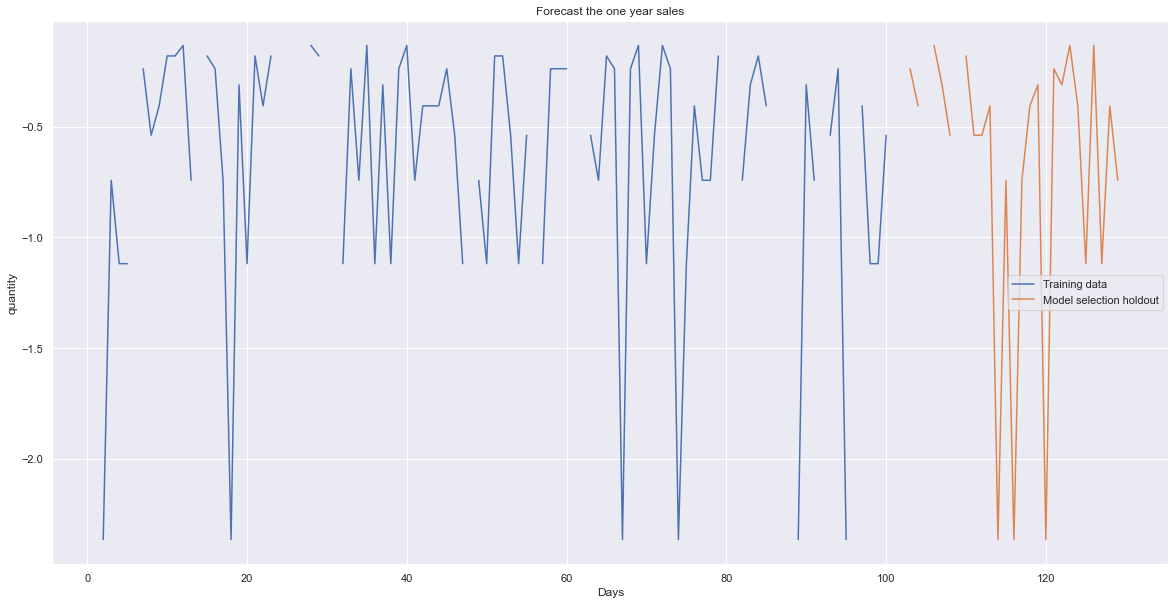

In [207]:
plt.plot(train_df.t, train_df.quantity, label='Training data')
plt.plot(select_df.t, select_df.quantity, label='Model selection holdout')
plt.legend()
plt.title('Forecast the one year sales')
plt.ylabel('quantity')
plt.xlabel('Days')
plt.show()
